# Loading Dataset

In [0]:
data = spark.sql('SELECT * FROM spam')
data = data.toPandas()
data.head()

Out[1]:

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,9.0
1,ham,Ok lar... Joking wif u oni...,29.0,6.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,6.0
3,ham,U dun say so early hor... U c already then say...,49.0,6.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,2.0


# Exploratory Data Analysis (EDA)

In [0]:
# check shape of data
data.shape

Out[2]: (5574, 4)

In [0]:
# check missing values
data.isnull().sum()

Out[3]: label 0
message 0
length 2
punct 2
dtype: int64

In [0]:
# check target balance
data['label'].value_counts(normalize = True)

Out[4]: ham 0.865985
spam 0.134015
Name: label, dtype: float64

Out[5]:

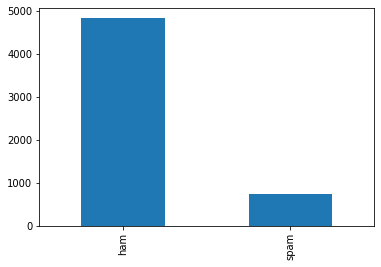

<AxesSubplot:>

In [0]:
# check target balance in a plot
data['label'].value_counts().plot.bar()

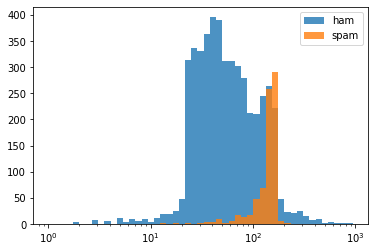

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(data[data['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

# Modeling

## Train Test Split

In [0]:
# Create Feature and Label sets
X = data['message']
y = data['label']

In [0]:
X

Out[8]: 0 Go until jurong point, crazy.. Available only ...
1 Ok lar... Joking wif u oni...
2 Free entry in 2 a wkly comp to win FA Cup fina...
3 U dun say so early hor... U c already then say...
4 Nah I don't think he goes to usf, he lives aro...
 ... 
5569 This is the 2nd time we have tried 2 contact u...
5570 Will ü b going to esplanade fr home?
5571 Pity, * was in mood for that. So...any other s...
5572 The guy did some bitching but I acted like i'd...
5573 Rofl. Its true to its name
Name: message, Length: 5574, dtype: object

In [0]:
y

Out[9]: 0 ham
1 ham
2 spam
3 ham
4 ham
 ... 
5569 spam
5570 ham
5571 ham
5572 ham
5573 ham
Name: label, Length: 5574, dtype: object

In [0]:
# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (3734,)
Testing Data : (1840,)

## Count Vectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

Out[11]: (3734, 7031)

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

Out[12]: LogisticRegression()

In [0]:
from sklearn import metrics

# transform X_test using CV
X_test_cv = cv.transform(X_test)

# Create a prediction set:
predictions = lr.predict(X_test_cv)

In [0]:
# confusion matrix

import pandas as pd
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

Out[14]:

,ham,spam
ham,1579,3
spam,28,230


In [0]:
# classification report
print(metrics.classification_report(y_test,predictions))

precision recall f1-score support

 ham 0.98 1.00 0.99 1582
 spam 0.99 0.89 0.94 258

 accuracy 0.98 1840
 macro avg 0.98 0.94 0.96 1840
weighted avg 0.98 0.98 0.98 1840

In [0]:
# Check AUC
print(metrics.roc_auc_score(y_test,lr.predict_proba(X_test_cv)[:, 1]))

0.9863826576113056

## Naive Bayes

In [0]:
# train a naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

Out[17]: MultinomialNB()

In [0]:
from sklearn import metrics

# Create a prediction set:
predictions_nb = nb.predict(cv.transform(X_test)) # transformed on the fly

In [0]:
# confusion matrix
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions_nb), index=['ham','spam'], columns=['ham','spam'])
df

Out[19]:

,ham,spam
ham,1577,5
spam,21,237


In [0]:
# Check AUC
print(metrics.roc_auc_score(y_test,nb.predict_proba(X_test_cv)[:, 1]))

0.9791452287850724